In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv('Student grade.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,maths grade,reading grade,writing grade,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,female,group B,bachelor's degree,standard,none,72,72,74,B,B,B,NaN,NaN,NaN,NaN,NaN,NaN
1,female,group C,some college,standard,completed,69,90,88,C,A,A,NaN,NaN,NaN,NaN,NaN,NaN
2,female,group B,master's degree,standard,none,90,95,93,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN
3,male,group A,associate's degree,free/reduced,none,47,57,44,E,D,E,NaN,NaN,NaN,NaN,NaN,NaN
4,male,group C,some college,standard,none,76,78,75,B,B,B,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   maths grade                  1000 non-null   object 
 9   reading grade                1000 non-null   object 
 10  writing grade                1000 non-null   object 
 11  Unnamed: 11                  0 non-null      float64
 12  Unnamed: 12                  0 non-null      float64
 13  Unnamed: 13        

In [4]:
# drop the Unnamed columns containing all NaN values
df.dropna(axis=1, how='all', inplace=True)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,maths grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,none,72,72,74,B,B,B
1,female,group C,some college,standard,completed,69,90,88,C,A,A
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,E,D,E
4,male,group C,some college,standard,none,76,78,75,B,B,B


In [7]:
# Bacis EDA
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   maths grade                  1000 non-null   object
 9   reading grade                1000 non-null   object
 10  writing grade                1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    10

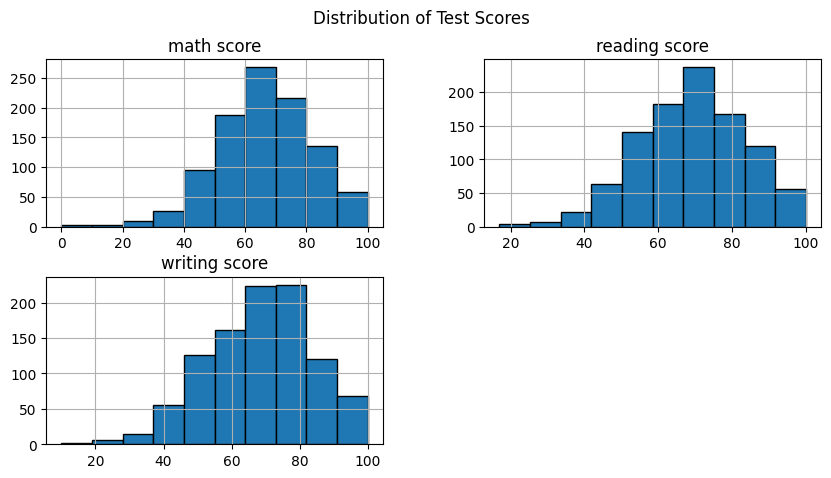

In [8]:
# visual EDA
numeric_cols = ['math score', 'reading score', 'writing score']
df[numeric_cols].hist(figsize=(10,5), bins=10, edgecolor='black')
plt.suptitle("Distribution of Test Scores")
plt.show()

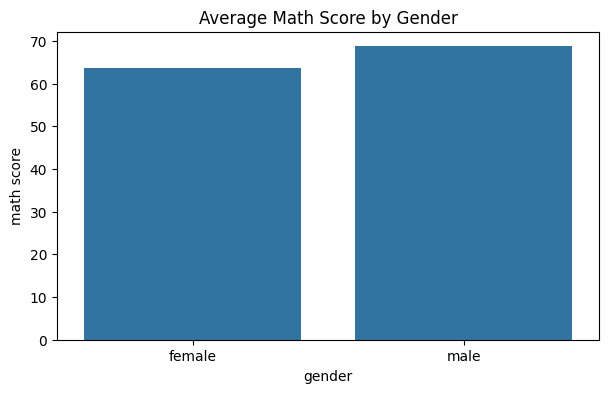

In [9]:
plt.figure(figsize=(7,4))
sns.barplot(x='gender', y='math score', data=df, ci=None)
plt.title("Average Math Score by Gender")
plt.show()

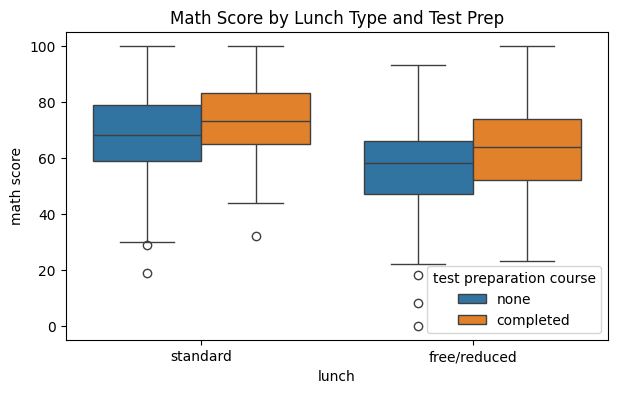

In [10]:
plt.figure(figsize=(7,4))
sns.boxplot(x='lunch', y='math score', hue='test preparation course', data=df)
plt.title("Math Score by Lunch Type and Test Prep")
plt.show()

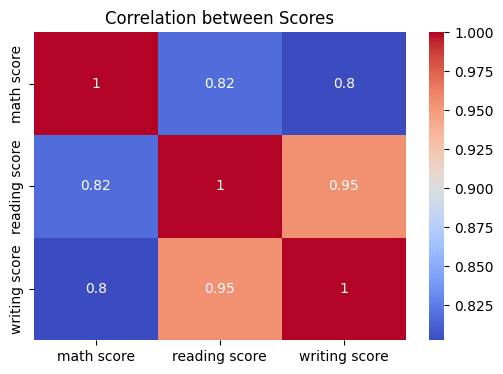

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()

In [12]:
# Data preparation for clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_encoded = df.copy()

# Encode categorical variables
label_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Select features for clustering
features = ['math score', 'reading score', 'writing score'] + label_cols
x= df_encoded[features]

# Standardize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


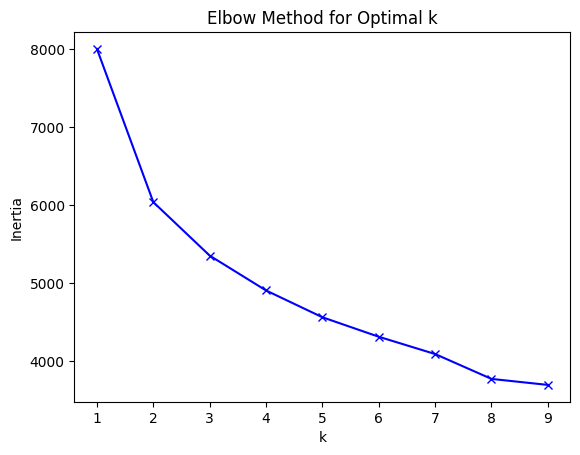

In [13]:
# K-Means Clustering
# finding the optimal number of clusters using the elbow method

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

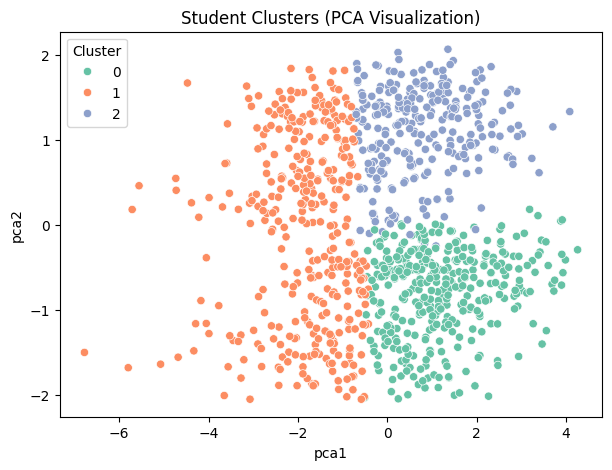

In [15]:
pca = PCA(2)
pca_data = pca.fit_transform(x_scaled)
df['pca1'] = pca_data[:,0]
df['pca2'] = pca_data[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=df, palette='Set2')
plt.title("Student Clusters (PCA Visualization)")
plt.show()


In [16]:
# Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster')[['math score', 'reading score', 'writing score']].mean()
print(cluster_summary)

         math score  reading score  writing score
Cluster                                          
0         71.387006      79.884181      80.163842
1         51.588398      54.685083      52.701657
2         77.968310      74.274648      72.528169


In [17]:
# inspect how clusters differ by gender or test prep
print(df.groupby(['Cluster', 'gender']).size())

Cluster  gender
0        female    354
1        female    164
         male      198
2        male      284
dtype: int64
